In [1]:
## IMPORT STUFF
import sys
import pandas as pd
import numpy as np
import datetime as dt
import time
import glob
sys.path.append('../')
sys.path.append('../potzy/')

#LOG IN INTO SIAMCHART
import potzy.metadata
import potzy.helpers
import potzy.siamchartdatareader as scdr

%load_ext autoreload
%autoreload

In [2]:
dr=scdr.SiamChartDataReader()
dr.loginToSiamChart()

In [3]:
dr.getDividendData('2S')

,dividend,close_price,dividend_yield
2010-04-26,0.25,3.34,7.49
2011-05-04,0.15,3.48,4.31
2012-05-08,0.12,2.52,4.76
2013-05-02,0.02224,2.88,0.77
2014-05-02,0.12,2.32,5.17
2015-03-11,0.1,4.14,2.42
2016-03-10,0.1,2.64,3.79
2016-08-24,0.08,4.34,1.84
2017-05-08,0.1,8.15,1.23
2017-08-21,0.06,4.08,1.47


In [2]:
### RENAME FILE
import os
path = '../data/siamchart/fs/2017/12/3/'
for name in os.listdir(path):
    # ignore files in path which aren't in the csv file
    print(name)

2S.csv
A.csv
AAV.csv
ABICO.csv
ABPIF.csv
ACAP.csv
ACC.csv
ADAM.csv
ADB.csv
ADVANC.csv
AEC.csv
AEONTS.csv
AF.csv
AFC.csv
AGE.csv
AH.csv
AHC.csv
AI.csv
AIE.csv
AIRA.csv
AIT.csv
AJ.csv
AJA.csv
AKP.csv
AKR.csv
ALLA.csv
ALT.csv
ALUCON.csv
AMA.csv
AMANAH.csv
AMARIN.csv
AMATA.csv
AMATAR.csv
AMATAV.csv
AMC.csv
ANAN.csv
AOT.csv
AP.csv
APCO.csv
APCS.csv
APEX.csv
APURE.csv
AQ.csv
AQUA.csv
ARIP.csv
ARROW.csv
AS.csv
ASAP.csv
ASEFA.csv
ASIA.csv
ASIAN.csv
ASIMAR.csv
ASK.csv
ASN.csv
ASP.csv
ATP30.csv
AU.csv
AUCT.csv
AYUD.csv
BA.csv
BAFS.csv
BANPU.csv
BAT-3K.csv
BAY.csv
BBL.csv
BCH.csv
BCP.csv
BCPG.csv
BDMS.csv
BEAUTY.csv
BEC.csv
BEM.csv
BFIT.csv
BGRIM.csv
BGT.csv
BH.csv
BIG.csv
BIZ.csv
BJC.csv
BJCHI.csv
BKD.csv
BKI.csv
BKKCP.csv
BLA.csv
BLAND.csv
BLISS.csv
BM.csv
BOL.csv
BPP.csv
BR.csv
BROCK.csv
BROOK.csv
BRR.csv
BRRGIF.csv
BSBM.csv
BSM.csv
BTC.csv
BTNC.csv
BTS.csv
BTSGIF.csv
BTW.csv
BUI.csv
BWG.csv
CBG.csv
CCET.csv
CCP.csv
CEN.csv
CENTEL.csv
CFRESH.csv
CGD.csv
CGH.csv
CHARAN.csv
CHEWA.csv
CHG.csv
CHO

In [4]:
%run 'header.ipynb'

In [5]:
len(os.listdir(path)), len(potzy.metadata.get_all_thai_tickers())

(736, 746)

In [18]:
fn='../data/siamchart/fs/2017/12/3/HMPRO.csv'
df = pd.read_csv(fn,index_col=[0])
df.index.name='time'
df.index = pd.DatetimeIndex(df.index)
df.sort_index(inplace=True)
df.tail()

,revenue,net_profit,eps,dps,gross_profit,ebit,ebitda,close_price,expense,operating_profit,...,ROCE%,NPM%,NPMA%,CurrentRatio,QuickRatio,month,year,dividend,number_of_shares,return_old
time,,,,,,,,,,,,,,,,,,,,,
2016-09-30,14808.53,948.42,0.070998,0.121069,3933.99,1332.80,2061.58,10.00,13475.74,767.45,...,21.164128,6.47,6.23,0.57,0.15,9,2016,1617.293571,13358.428571,2805.27
2016-12-31,16088.51,1319.93,0.099190,-0.001042,4338.31,1675.42,2421.81,10.20,14413.09,902.36,...,24.496713,7.04,6.75,0.71,0.28,12,2016,-13.859585,13307.096774,4125.20
2017-03-31,15272.57,1046.23,0.080000,0.000000,3711.40,1405.43,2171.03,9.65,13867.14,410.41,...,19.200000,7.33,6.85,0.71,0.21,3,2017,0.000000,13077.875000,1046.23
2017-06-30,15773.47,1131.20,0.088317,0.150000,4745.87,1505.33,2270.56,9.60,14268.14,1432.90,...,18.785537,7.27,7.01,0.86,0.34,6,2017,1921.261765,12808.411765,2177.43
2017-09-30,16155.23,1183.00,0.091530,0.131350,4445.47,1575.04,2346.28,12.20,14580.19,997.11,...,21.629232,7.38,7.12,0.72,0.19,9,2017,1697.662851,12924.730769,3360.43


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c4e7cf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c72a3c8>], dtype=object)

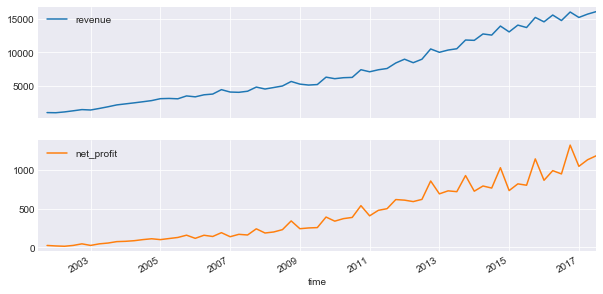

In [20]:
df[['revenue','net_profit']].plot(subplots=True)